# Preprocessing(numerical)-demo

## 라이브러리 import 및 설정

In [11]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [12]:
from matplotlib import rcParams, pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from warnings import simplefilter

In [13]:
rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
simplefilter('ignore')

## 학습데이터 로드

In [14]:
data_dir = Path('C:\DACON\dataset')
trn_file = data_dir / 'train.csv'
tst_file = data_dir / 'test.csv'
feature_file = data_dir / 'feature.csv'
seed = 12

In [15]:
df = pd.read_csv(trn_file, index_col=0)
print(df.shape)
df.head()

(1459, 10)


,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,,,,,,,,,,
3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 3 to 2179
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hour                    1459 non-null   int64  
 1   hour_bef_temperature    1457 non-null   float64
 2   hour_bef_precipitation  1457 non-null   float64
 3   hour_bef_windspeed      1450 non-null   float64
 4   hour_bef_humidity       1457 non-null   float64
 5   hour_bef_visibility     1457 non-null   float64
 6   hour_bef_ozone          1383 non-null   float64
 7   hour_bef_pm10           1369 non-null   float64
 8   hour_bef_pm2.5          1342 non-null   float64
 9   count                   1459 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 125.4 KB


hour와 count를 제외한 변수들에 결측값 다수 존재

In [17]:
# df.fillna(0, inplace=True)
df = df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1328 entries, 3 to 2179
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hour                    1328 non-null   int64  
 1   hour_bef_temperature    1328 non-null   float64
 2   hour_bef_precipitation  1328 non-null   float64
 3   hour_bef_windspeed      1328 non-null   float64
 4   hour_bef_humidity       1328 non-null   float64
 5   hour_bef_visibility     1328 non-null   float64
 6   hour_bef_ozone          1328 non-null   float64
 7   hour_bef_pm10           1328 non-null   float64
 8   hour_bef_pm2.5          1328 non-null   float64
 9   count                   1328 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 114.1 KB


In [18]:
df.describe()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000
mean,11.905120,16.866039,0.030120,2.489834,51.740964,1413.655120,0.039091,57.481175,30.382530,110.804970
std,6.746907,5.196544,0.170983,1.382797,20.167066,577.258705,0.019430,31.221062,14.740807,82.900629
min,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,6.000000,13.000000,0.000000,1.400000,36.000000,899.000000,0.026000,36.000000,20.000000,37.000000
50%,12.000000,16.800000,0.000000,2.400000,50.000000,1581.500000,0.038500,52.000000,26.000000,100.500000
75%,18.000000,20.200000,0.000000,3.400000,68.000000,1993.250000,0.052000,70.000000,37.000000,153.000000
max,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


모든 수치형변수가 0이나 양수의 값

In [19]:
target_col = 'count'
pred_col = 'pred'
num_cols = [x for x in df.columns if df[x].dtype in [np.int64, np.float64] and x != target_col and x != 'hour_bef_precipitation']
print(num_cols)

['hour', 'hour_bef_temperature', 'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility', 'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5']


<AxesSubplot:>

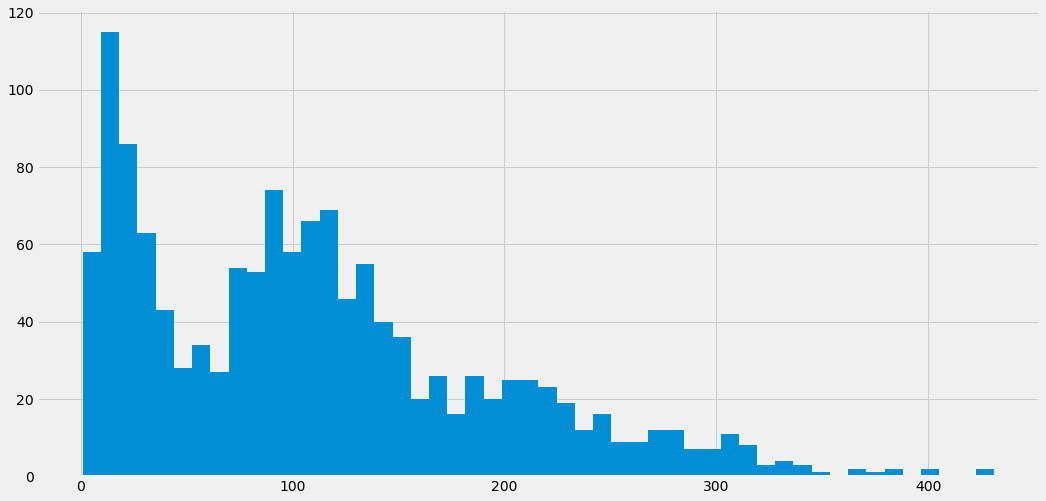

In [20]:
df[target_col].hist(bins=50)

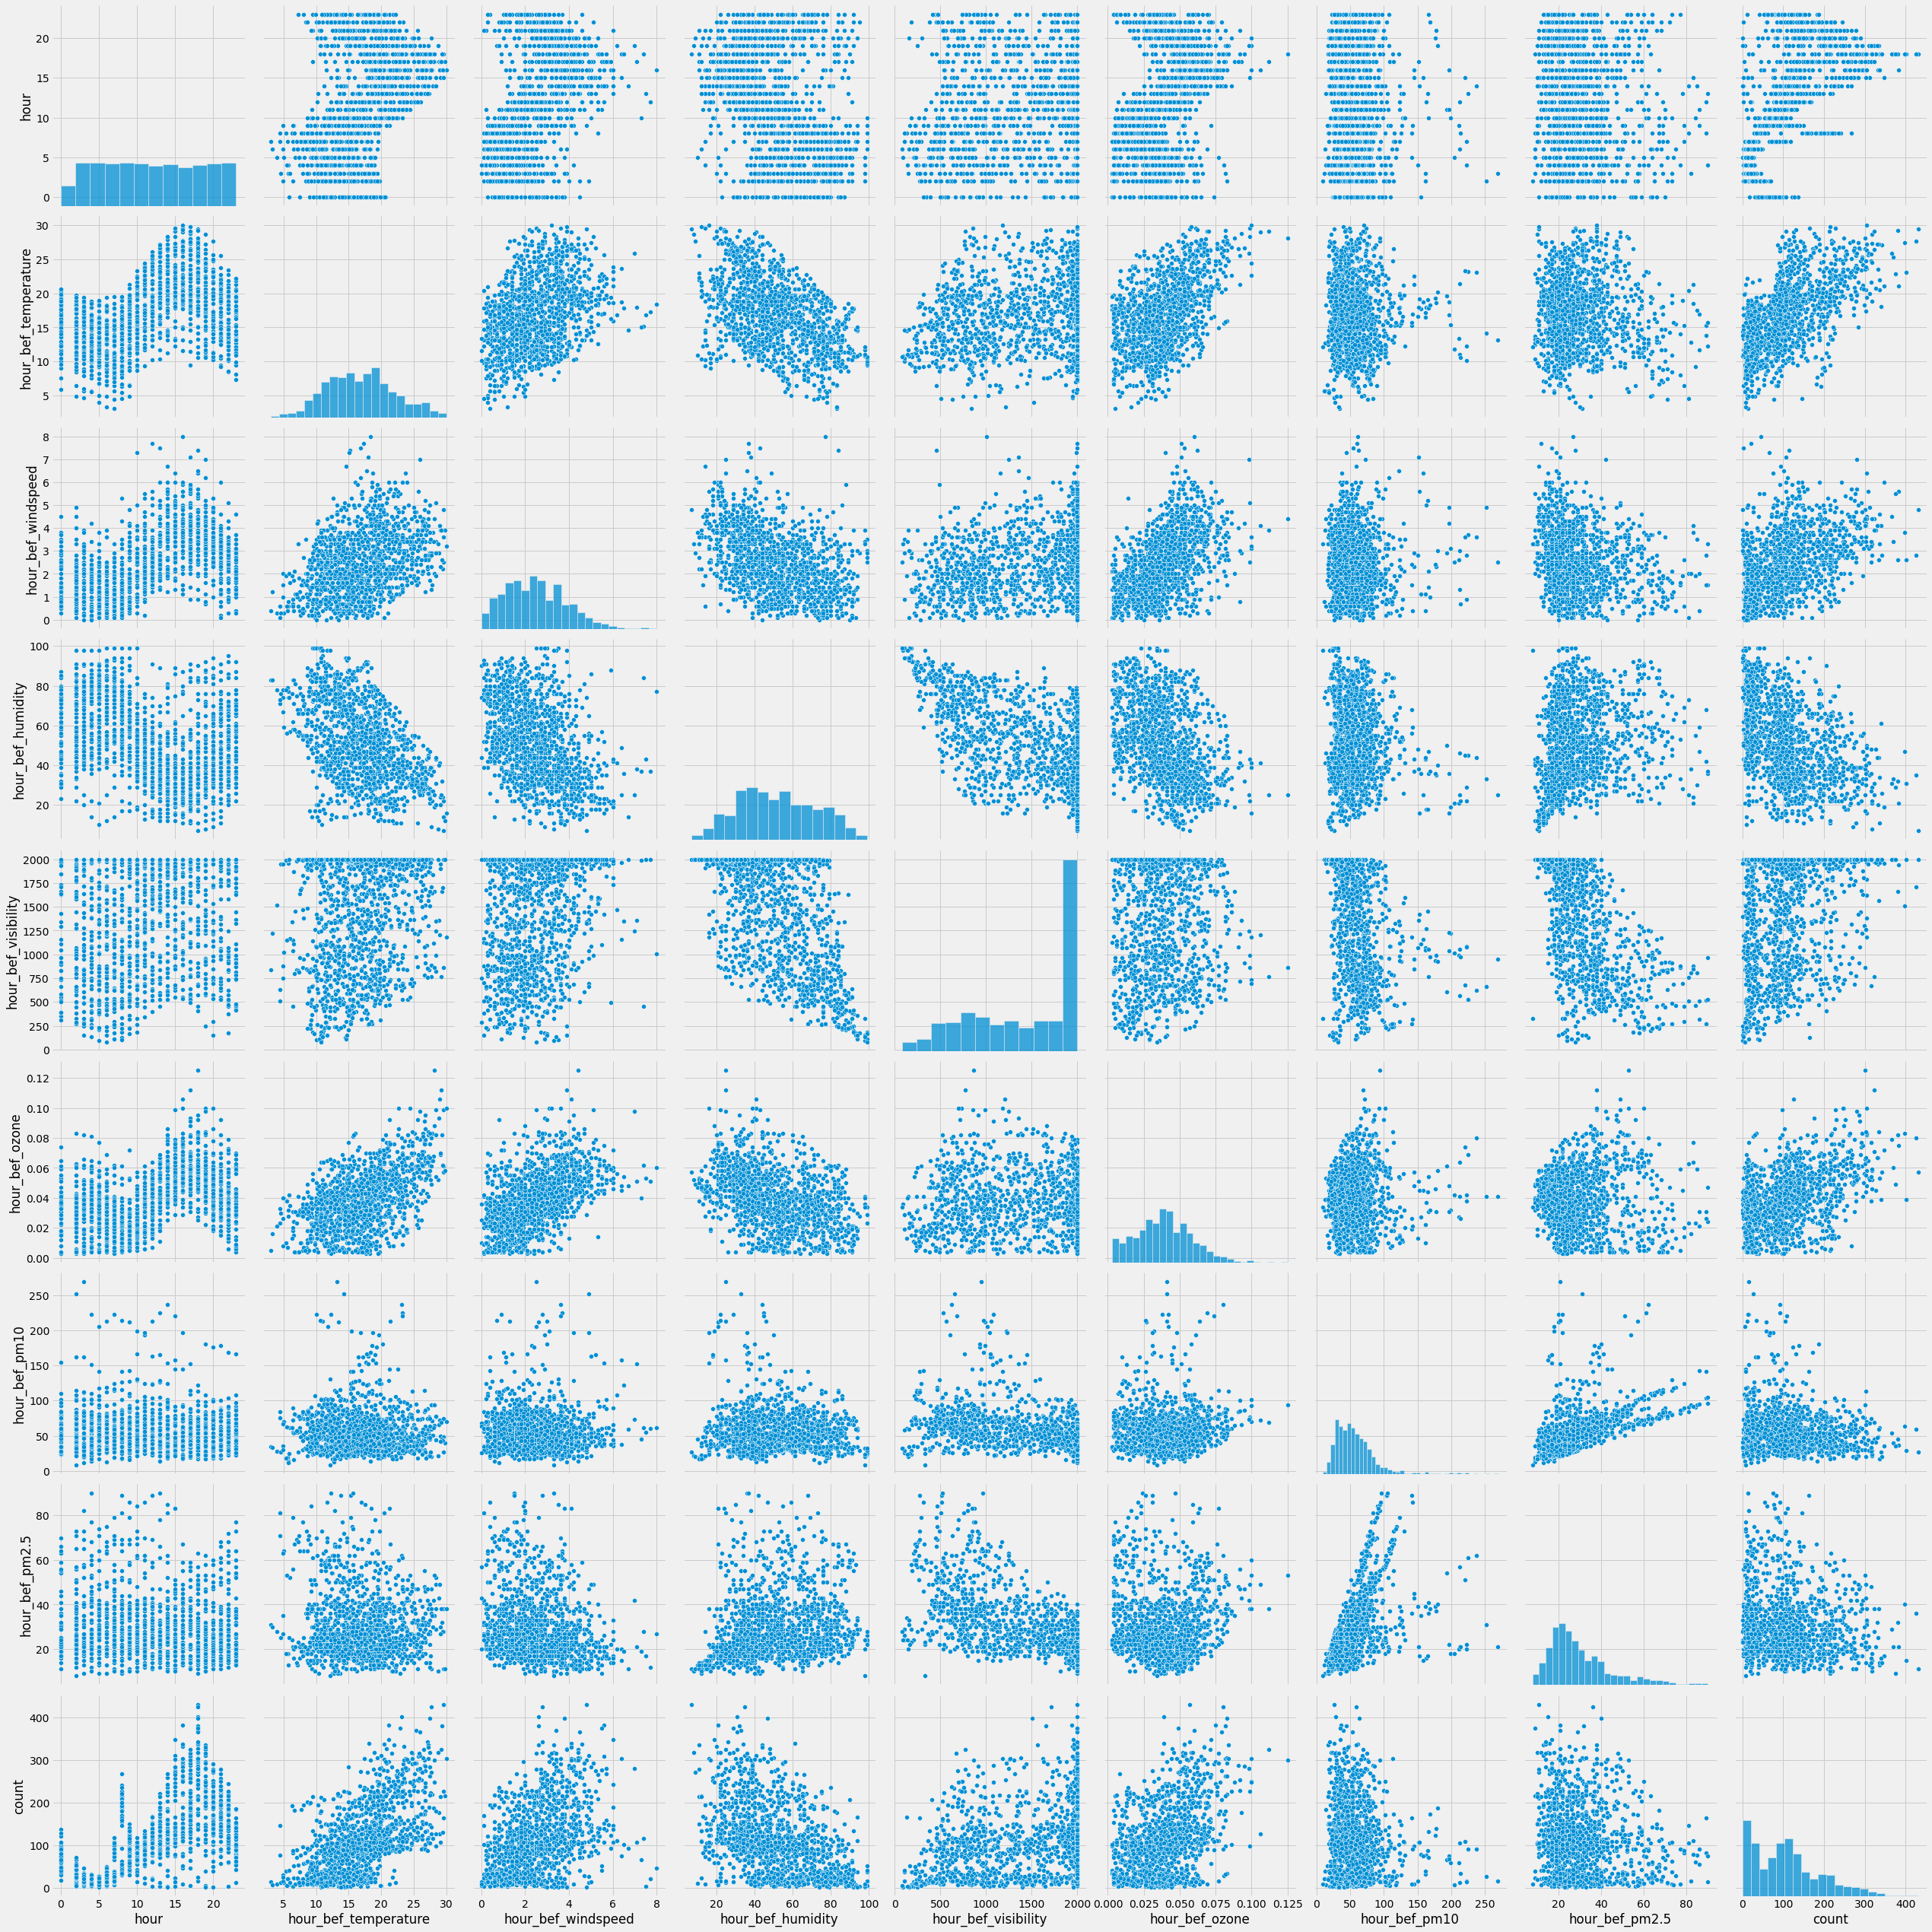

In [21]:
sns.pairplot(data=df, vars=num_cols + [target_col], size=4)

수치형변수 중 hour_bef_visibility, count는 정규분포와 거리가 멈

In [22]:
df.corr().style.background_gradient()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
hour,1.000000,0.400910,0.022076,0.459260,-0.324225,0.195596,0.387982,-0.047936,-0.062396,0.620985
hour_bef_temperature,0.400910,1.000000,-0.095280,0.369624,-0.483889,0.200940,0.528050,-0.036909,-0.078767,0.610444
hour_bef_precipitation,0.022076,-0.095280,1.000000,0.012133,0.264732,-0.196578,-0.063887,-0.050290,0.004096,-0.159449
hour_bef_windspeed,0.459260,0.369624,0.012133,1.000000,-0.427355,0.260716,0.515415,-0.004542,-0.197861,0.458083
hour_bef_humidity,-0.324225,-0.483889,0.264732,-0.427355,1.000000,-0.594662,-0.406968,-0.090507,0.165890,-0.459149
hour_bef_visibility,0.195596,0.200940,-0.196578,0.260716,-0.594662,1.000000,0.096771,-0.417851,-0.643252,0.308597
hour_bef_ozone,0.387982,0.528050,-0.063887,0.515415,-0.406968,0.096771,1.000000,0.089405,0.016552,0.468639
hour_bef_pm10,-0.047936,-0.036909,-0.050290,-0.004542,-0.090507,-0.417851,0.089405,1.000000,0.487626,-0.137321
hour_bef_pm2.5,-0.062396,-0.078767,0.004096,-0.197861,0.165890,-0.643252,0.016552,0.487626,1.000000,-0.136345
count,0.620985,0.610444,-0.159449,0.458083,-0.459149,0.308597,0.468639,-0.137321,-0.136345,1.000000


# Linear regression 모델 학습

## RMSE/RMLSE 손실함수 정의

In [23]:
rmse = lambda y,p : np.sqrt(mean_squared_error(y,p))
rmlse = lambda y,p : np.sqrt(mean_squared_error(np.log1p(y),np.log1p(p)))

## 변수 가공없이 선형회귀 모델 학습

In [24]:
lr = LinearRegression()
lr.fit(df[num_cols], df[target_col])
df[pred_col] = lr.predict(df[num_cols])

print(f' RMSE:\t{rmse(df[target_col], df[pred_col]):12.2f}')

 RMSE:	       53.72


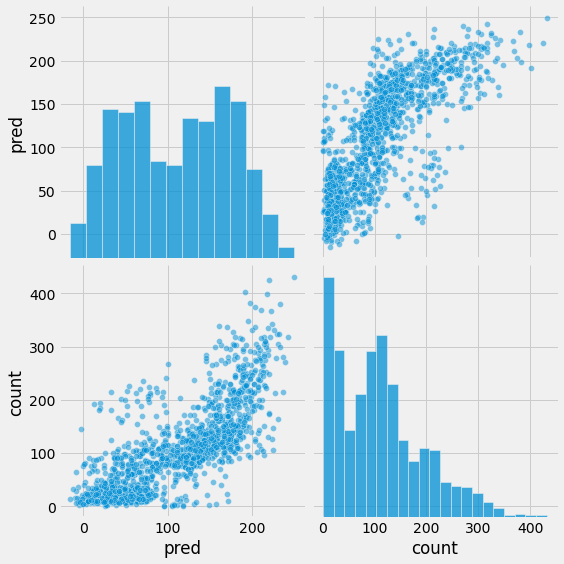

In [25]:
sns.pairplot(data=df, vars=[pred_col, target_col], size=4, plot_kws={'alpha': .5})

## 정규화/스케일링

In [31]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [33]:
scaler = StandardScaler() # MinMaxScaler()
X = scaler.fit_transform(df[num_cols])

lr = LinearRegression()
lr.fit(X, np.log1p(df[target_col]))
df[pred_col] = np.expm1(lr.predict(X))

print(f' RMSE:\t{rmse(df[target_col], df[pred_col]):12.2f}')
print(f'RMLSE:\t{rmlse(df[target_col], df[pred_col]):12.2f}')

 RMSE:	       54.74
RMLSE:	        0.69


## Binning

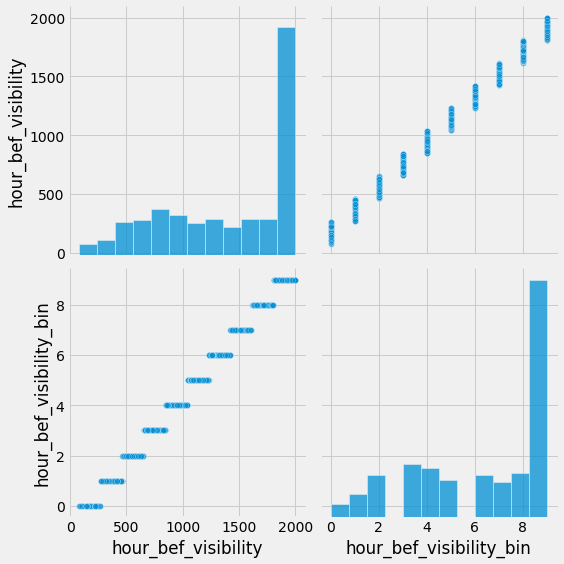

In [37]:
df['hour_bef_visibility_bin'] = pd.cut(df['hour_bef_visibility'], 10, labels=False)
sns.pairplot(data=df, vars=['hour_bef_visibility', 'hour_bef_visibility_bin'], size=4, plot_kws={'alpha': .5})

In [40]:
df['hour_bef_visibility_bin'] = pd.cut(df['hour_bef_visibility'], 10, labels=False)
df[['hour_bef_visibility', 'hour_bef_visibility_bin']].head()

,hour_bef_visibility,hour_bef_visibility_bin
id,,
3,576.0,2
6,916.0,4
7,1382.0,6
8,946.0,4
9,2000.0,9
